<a href="https://colab.research.google.com/github/larrymoralez/ML_HW_-2/blob/master/ML_HW_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import libraries
import numpy as np
from matplotlib import pyplot
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [0]:
#split data into training and test data. Be careful to only run once or it will split data over and over again.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [0]:
#Set initial params
batch_size = 32
num_classes = 10
epochs = 50
RMS = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [0]:
#Convert labels to categroical
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [16]:
#Define model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 15, 15, 64)        0         
__________

In [0]:
#Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=RMS,
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data=(x_val, y_val), shuffle = True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 710s 18ms/step - loss: 3.2060 - acc: 0.2493 - val_loss: 2.2142 - val_acc: 0.3317
Epoch 2/50
40000/40000 [==============================] - 718s 18ms/step - loss: 1.9706 - acc: 0.3564 - val_loss: 1.8318 - val_acc: 0.3952
Epoch 3/50
40000/40000 [==============================] - 731s 18ms/step - loss: 1.6922 - acc: 0.4218 - val_loss: 1.6378 - val_acc: 0.4449
Epoch 4/50
40000/40000 [==============================] - 725s 18ms/step - loss: 1.5315 - acc: 0.4722 - val_loss: 1.5423 - val_acc: 0.4705
Epoch 5/50
40000/40000 [==============================] - 711s 18ms/step - loss: 1.4227 - acc: 0.5067 - val_loss: 1.4556 - val_acc: 0.4988
Epoch 6/50
40000/40000 [==============================] - 715s 18ms/step - loss: 1.3424 - acc: 0.5340 - val_loss: 1.4029 - val_acc: 0.5192
Epoch 7/50
40000/40000 [==============================] - 715s 18ms/step - loss: 1.2769 - acc: 0.5562 - val_loss: 1.

In [19]:
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=1)

10000/10000 [==============================] - 33s 3ms/step


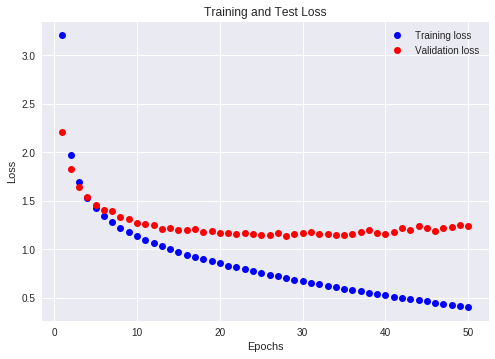

In [20]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'ro', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

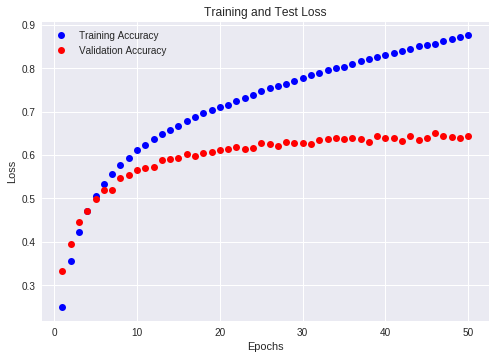

In [21]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs_range, acc, 'bo', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'ro', label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()